# **EmbedSeg (2D)**
---

<font size = 4>**EmbedSeg 2D** is a deep-learning method that can be used to segment object from bioimages and was first published by [Lalit *et al.* in 2021, on arXiv](https://arxiv.org/abs/2101.10033). 

<font size = 4> **This particular notebook enables segmentation of 2D dataset. If you are interested in 3D dataset, you should use the StarDist 3D or Unet 3D notebooks instead.**

---
<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the Zero-Cost Deep-Learning to Enhance Microscopy project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook is largely based on the paper:

<font size = 4>**Embedding-based Instance Segmentation in Microscopy
** from Manan Lalit *et al.* (https://arxiv.org/abs/2101.10033)

<font size = 4>**The Original code** is freely available in GitHub:
https://github.com/juglab/EmbedSeg

<font size = 4>**Please also cite this original paper when using or developing this notebook.**


# **How to use this notebook?**

---

<font size = 4>Video describing how to use our notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

#**0. Before getting started**
---
<font size = 4> For EmbedSeg to train, **it needs to have access to a paired training dataset made of images of nuclei and their corresponding masks**. Information on how to generate a training dataset is available in our Wiki page: https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki

<font size = 4>**We strongly recommend that you generate extra paired images. These images can be used to assess the quality of your trained model**. The quality control assessment can be done directly in this notebook.

<font size = 4>The data structure is important. It is necessary that all the input data are in the same folder and that all the output data is in a separate folder. The provided training dataset is already split in two folders called "Training - Images" (Training_source) and "Training - Masks" (Training_target).

<font size = 4>Additionally, the corresponding Training_source and Training_target files need to have **the same name**.

<font size = 4>Please note that you currently can **only use .tif files!**

<font size = 4>You can also provide a folder that contains the data that you wish to analyse with the trained network once all training has been performed. This can include Test dataset for which you have the equivalent output and can compare to what the network provides.

<font size = 4>Here's a common data structure that can work:
*   Experiment A
    - **Training dataset**
      - Images to segment (Training_source)
        - img_1.tif, img_2.tif, ...
      - Masks (Training_target)
        - img_1.tif, img_2.tif, ...
    - **Quality control dataset**
     - Images to segment
        - img_1.tif, img_2.tif
      - Masks 
        - img_1.tif, img_2.tif
    - **Data to be predicted**
    - **Results**

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---

# **1. Install EmbedSeg and dependencies**
---


## **1.0. Upgrading PyPI and uninstalling incompatible dependencies**
---
<font size = 4> 

### To make sure the EmbedSeg network operates in Google colab, it is needed to do some adjustment concerning deafult installed packages and libraries prior to the installation of key dependencies. Once incompatible pacakges are uninstalled, it is needed to restart the session and then proceed.

In [1]:
#@markdown ##Press play to Uninstall
print("============================================ Upgrading Python Package Installer (PyPI) ============================================")
!pip3 install --upgrade pip -q

print("================================================== Ignore the following warnings ==================================================")
%pip uninstall matplotlib -y -q
%pip uninstall torch -y -q
%pip uninstall torchvision -y -q
%pip uninstall torchtext -y -q
%pip uninstall torchaudio -y -q
%pip uninstall fastai -y -q
%pip install matplotlib==3.6.2 -q

============================================ Upgrading Python Package Installer (PyPI) ============================================
     |████████████████████████████████| 2.1 MB 6.5 MB/s 
================================================== Ignore the following warnings ==================================================
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 kB 26.8 MB/s eta 0:00:00


In [ ]:
#@markdown ##Press play to restart session
import os
os.kill(os.getpid(), 9)

## **1.1. Install key dependencies**
---
<font size = 4> 

In [1]:
#@markdown ##Press play to Install

Run_in_Quiet_Mode = True #@param {type:"boolean"}
if Run_in_Quiet_Mode:

    print ("Installing EmbedSeg and its dependencies... ")

    %pip install git+https://github.com/juglab/EmbedSeg.git -q
    %pip install torch==1.5.1 -q
    %pip install torchvision==0.6.1 -q

    print ("Installing some extra packages... ")
    !pip install -q wget
    !pip install -q tifffile
    !pip install -q gputools
    !pip install -q fpdf
    !pip install -q PTable # Nice tables 
    !pip install -q imagecodecs
    !pip install -q matplotlib
    !pip install -q tkinterwidgets
    !pip install -q memory_profiler
    %load_ext memory_profiler

else:
    print ('--------------------------------------------------------------------------------------------------------')
    print ("-----------------------------------------Hacker Mode Enabled 🐱‍💻-----------------------------------------")
    print ('--------------------------------------------------------------------------------------------------------')

    print ("Installing EmbedSeg and its dependencies... ")

    %pip install git+https://github.com/juglab/EmbedSeg.git
    %pip install torch==1.5.1 
    %pip install torchvision==0.6.1 

    print ("Installing some extra packages... ")
    !pip install  wget
    !pip install  tifffile
    !pip install  gputools
    !pip install  fpdf
    !pip install  PTable # Nice tables 
    !pip install  imagecodecs
    !pip install  matplotlib
    !pip install  tkinterwidgets
    !pip install  memory_profiler
    %load_ext memory_profiler


Installing EmbedSeg and its dependencies... 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.2/753.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 66.1 MB/s eta 0:00:00
Installing some extra packages... 
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.1/917.1 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.7/191.7 kB 23.8 MB/s eta 0:00:00
  Preparing metadat

## **1.2. Load key dependencies**
---
<font size = 4> 

In [2]:
#@markdown ##Load key dependencies


#============================================================
#Here we define where all the temporary files are saved

data_dir= "/content/data_dir"
print ("Data directory path is set as {}" .format(data_dir))
#============================================================



Notebook_version = '1.13' # UPDATED 26.12.2022 by Amin
Network = 'EmbedSeg 2D'

%matplotlib inline

import sys
import csv
import json
import wget
import fpdf
import time
import h5py
import urllib
import shutil
import zipfile
import colorsys
import tifffile
import warnings
import matplotlib
import subprocess
import os, random
import imagecodecs
import numpy as np
import pandas as pd
import urllib.request
import matplotlib as mpl
import torch, torchvision
import ipywidgets as widgets
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from tqdm import tqdm
from tqdm.notebook import tqdm_notebook

from scipy import signal
from scipy import ndimage

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from skimage import io
from skimage import img_as_float32
from skimage.util import img_as_uint
from skimage.util import img_as_ubyte
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr

from glob import glob
from numba import jit
from pathlib import Path
from datetime import datetime
from tabulate import tabulate
from fpdf import FPDF, HTMLMixin
from collections import namedtuple
from tifffile import imread, imsave
from __future__ import print_function

from astropy.visualization import simple_norm
from scipy.optimize import linear_sum_assignment
from sklearn.linear_model import LinearRegression
from pip._internal.operations.freeze import freeze
from ipywidgets import interact, interactive, fixed, interact_manual

from EmbedSeg.train import invert_one_hot
from EmbedSeg.train import begin_training
from EmbedSeg.test import begin_evaluating
from EmbedSeg.utils.generate_crops import *
from EmbedSeg.utils.visualize import visualize
from EmbedSeg.utils.create_dicts import create_test_configs_dict
from EmbedSeg.utils.preprocess_data import extract_data, split_train_val, get_data_properties
from EmbedSeg.utils.create_dicts import create_dataset_dict, create_model_dict, create_loss_dict, create_configs
from EmbedSeg.utils.preprocess_data import split_train_val, get_data_properties, split_train_test, split_train_crops

#===========================================================

print ('--------------------------------------------------------------------------------------------------------')

# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'
W  = '\033[0m'  # white (normal)
R  = '\033[31m' # red

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#===========================================================


# Check if this is the latest version of the notebook
All_notebook_versions = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_Notebook_versions.csv", dtype=str)
print('Notebook version: '+Notebook_version)
Latest_Notebook_version = All_notebook_versions[All_notebook_versions["Notebook"] == Network]['Version'].iloc[0]
print('Latest notebook version: '+Latest_Notebook_version)
if Notebook_version == Latest_Notebook_version:
  print("This notebook is up-to-date.")
else:
  print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")

print ('--------------------------------------------------------------------------------------------------------')

def random_label_cmap(n=2**16, h = (0,1), l = (.4,1), s =(.2,.8)):
    h,l,s = np.random.uniform(*h,n), np.random.uniform(*l,n), np.random.uniform(*s,n)
    cols = np.stack([colorsys.hls_to_rgb(_h,_l,_s) for _h,_l,_s in zip(h,l,s)],axis=0)
    cols[0] = 0
    return matplotlib.colors.ListedColormap(cols)

lbl_cmap = random_label_cmap()

warnings.filterwarnings('ignore')

print ('--------------------------------------------------------------------------------------------------------')


print ("    ⬛                              🟪")
print ("    ⬛⬛                         🟪🟪")
print ("    ⬛⬛🟫                    🟦🟪🟪")
print ("    ⬛⬛⬛⬛               🟦🟪🟪🟪")
print ("    ⬛⬛🟫🟦⬛          🟦🟪🟦🟪🟪")
print ("    ⬛⬛⬛🟫🟪⬛🟫🟪🟦🟪🟦🟪🟪🟪")
print ("    ⬛⬛🟫🟪🟫🟦⬛🟦🟪🟦🟪🟦🟪🟪")
print ("    ⬛⬛⬛🟫⬛          🟪🟦🟪🟪🟪")
print ("    ⬛⬛🟫⬛               🟦🟪🟪🟪")
print ("    ⬛⬛⬛                    🟦🟪🟪")
print ("    ⬛⬛                         🟪🟪")
print ("    ⬛                              🟪")
print(color.PURPLE + '              ZeroCostDL4Mic          ' + color.END)

now = datetime.now()
print("Finished at =", now, "UTC")

#===============================================================================================================

#Create a pdf document with training summary

def pdf_export(trained = True, augmentation = False, pretrained_model = False):
    # save FPDF() class into a  
    # variable pdf 
    #from datetime import datetime

    class MyFPDF(FPDF, HTMLMixin):
        pass

    pdf = MyFPDF()
    pdf.add_page()
    pdf.set_right_margin(-1)
    pdf.set_font("Arial", size = 11, style='B')
    
    Notebook_version = ['1.0']

    day = datetime.now()
    datetime_str = str(day)[0:10]

    Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+datetime_str
    pdf.multi_cell(180, 5, txt = Header, align = 'L') 

    # add another cell 
    if trained:
      training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
      pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
    pdf.ln(1)

    Header_2 = 'Information for your materials and methods:'
    pdf.cell(190, 5, txt=Header_2, ln=1, align='L')

    all_packages = ''
    for requirement in freeze(local_only=True):
      all_packages = all_packages+requirement+', '
    #print(all_packages)

    #Main Packages
    main_packages = ''
    version_numbers = []
    for name in ['tensorflow','numpy','Keras','csbdeep']:
      find_name=all_packages.find(name)
      main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
      #Version numbers only here:
      version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

    cuda_version = subprocess.run('nvcc --version',stdout=subprocess.PIPE, shell=True)
    cuda_version = cuda_version.stdout.decode('utf-8')
    cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
    gpu_name = subprocess.run('nvidia-smi',stdout=subprocess.PIPE, shell=True)
    gpu_name = gpu_name.stdout.decode('utf-8')
    gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]
    #print(cuda_version[cuda_version.find(', V')+3:-1])
    #print(gpu_name)

    shape = io.imread(Training_source_temp+'/'+os.listdir(Training_source_temp)[1]).shape
    dataset_size = len(os.listdir(Training_source_temp))

    text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' epochs on '+str(dataset_size)+' paired image patches (image dimensions: '+str(shape)+', with a batch size of '+str(batch_size)+', using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+'). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'


    if pretrained_model:
      text = 'The '+Network+' model was trained for '+str(number_of_epochs)+' epochs on '+str(dataset_size)+' paired image patches (image dimensions: '+str(shape)+', with a batch size of '+str(batch_size)+', using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+'). The model was re-trained from a pretrained model. Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

    # print(text)

    pdf.set_font('')
    pdf.set_font_size(10.)
    pdf.multi_cell(190, 5, txt = text, align='L')
    pdf.set_font('')
    pdf.set_font('Arial', size = 10, style = 'B')
    pdf.ln(1)
    pdf.cell(28, 5, txt='Augmentation: ', ln=0)
    pdf.set_font('')
    if augmentation:
      aug_text = 'The dataset was augmented by a factor of '+str(Multiply_dataset_by)

    else:
      aug_text = 'No augmentation was used for training.'
    pdf.multi_cell(190, 5, txt=aug_text, align='L')
    pdf.set_font('Arial', size = 11, style = 'B')
    pdf.ln(1)
    pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
    pdf.set_font('')
    pdf.set_font_size(10.)
    if Use_Default_Advanced_Parameters:
      pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
    pdf.cell(200, 5, txt='The following parameters were used for training:')
    pdf.ln(1)
    html = """ 
    <table width=40% style="margin-left:0px;">
      <tr>
        <th width = 50% align="left">Parameter</th>
        <th width = 50% align="left">Value</th>
      </tr>
      <tr>
        <td width = 50%>number_of_epochs</td>
        <td width = 50%>{0}</td>
      </tr>
      <tr>
        <td width = 50%>batch_size</td>
        <td width = 50%>{1}</td>
      </tr>
      <tr>
        <td width = 50%>percentage_validation</td>
        <td width = 50%>{2}</td>
      </tr>
      <tr>
        <td width = 50%>initial_learning_rate</td>
        <td width = 50%>{3}</td>
      </tr>
    </table>
    """.format(number_of_epochs,batch_size,percentage_validation,initial_learning_rate)
    pdf.write_html(html)

    #pdf.multi_cell(190, 5, txt = text_2, align='L')
    pdf.set_font("Arial", size = 11, style='B')
    pdf.ln(1)
    pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
    pdf.set_font('')
    pdf.set_font('Arial', size = 10, style = 'B')
    pdf.cell(29, 5, txt= 'Training_source:', align = 'L', ln=0)
    pdf.set_font('')
    pdf.multi_cell(170, 5, txt = Training_source, align = 'L')
    pdf.set_font('')
    pdf.set_font('Arial', size = 10, style = 'B')
    pdf.cell(27, 5, txt= 'Training_target:', align = 'L', ln=0)
    pdf.set_font('')
    pdf.multi_cell(170, 5, txt = Training_target, align = 'L')
    #pdf.cell(190, 5, txt=aug_text, align='L', ln=1)
    pdf.ln(1)
    pdf.set_font('')
    pdf.set_font('Arial', size = 10, style = 'B')
    pdf.cell(22, 5, txt= 'Model Path:', align = 'L', ln=0)
    pdf.set_font('')
    pdf.multi_cell(170, 5, txt = model_path, align = 'L')
    pdf.ln(1)
    pdf.cell(60, 5, txt = 'Example Training pair', ln=1)
    pdf.ln(1)
    exp_size = io.imread('/content/TrainingDataExample_EmbedSeg2D.png').shape
    pdf.image('/content/TrainingDataExample_EmbedSeg2D.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
    pdf.ln(1)

    ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
    pdf.multi_cell(190, 5, txt = ref_1, align='L')

    ref_2 = '- EmbedSeg: Manan Lalit, et al. "Embedding-based Instance Segmentation in Microscopy" https://arxiv.org/abs/2101.10033 '
    pdf.multi_cell(190, 5, txt = ref_2, align='L')

    ref_3 = '- Amin Rezaei, implementing ZeroCostDL4Mic method on an already functional jupyter notebook. "to be updated'
    pdf.multi_cell(190, 5, txt = ref_3, align='L')

    pdf.ln(3)
    reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
    pdf.set_font('Arial', size = 11, style='B')
    pdf.multi_cell(190, 5, txt=reminder, align='C')

    output_folder_per = model_path+'/'+model_name+"/Training_Report"
    if os.path.exists(output_folder_per):
        shutil.rmtree(output_folder_per)
    os.makedirs(output_folder_per)

    pdf.output(output_folder_per+'/'+'training_report.pdf')

#===============================================================================================================

## ------------------- Instance segmentation metrics ------------------------------

# Here we load the def that perform the QC, code adapted from the StarDist repo  https://github.com/mpicbg-csbd/stardist/blob/master/stardist/matching.py

matching_criteria = dict()

def label_are_sequential(y):
    """ returns true if y has only sequential labels from 1... """
    labels = np.unique(y)
    return (set(labels)-{0}) == set(range(1,1+labels.max()))


def is_array_of_integers(y):
    return isinstance(y,np.ndarray) and np.issubdtype(y.dtype, np.integer)


def _check_label_array(y, name=None, check_sequential=False):
    err = ValueError("{label} must be an array of {integers}.".format(
        label = 'labels' if name is None else name,
        integers = ('sequential ' if check_sequential else '') + 'non-negative integers',
    ))
    is_array_of_integers(y) or print("An error occured")
    if check_sequential:
        label_are_sequential(y) or print("An error occured")
    else:
        y.min() >= 0 or print("An error occured")
    return True


def label_overlap(x, y, check=True):
    if check:
        _check_label_array(x,'x',True)
        _check_label_array(y,'y',True)
        x.shape == y.shape or _raise(ValueError("x and y must have the same shape"))
    return _label_overlap(x, y)

@jit(nopython=True)
def _label_overlap(x, y):
    x = x.ravel()
    y = y.ravel()
    overlap = np.zeros((1+x.max(),1+y.max()), dtype=np.uint)
    for i in range(len(x)):
        overlap[x[i],y[i]] += 1
    return overlap


def intersection_over_union(overlap):
    _check_label_array(overlap,'overlap')
    if np.sum(overlap) == 0:
        return overlap
    n_pixels_pred = np.sum(overlap, axis=0, keepdims=True)
    n_pixels_true = np.sum(overlap, axis=1, keepdims=True)
    return overlap / (n_pixels_pred + n_pixels_true - overlap)

matching_criteria['iou'] = intersection_over_union


def intersection_over_true(overlap):
    _check_label_array(overlap,'overlap')
    if np.sum(overlap) == 0:
        return overlap
    n_pixels_true = np.sum(overlap, axis=1, keepdims=True)
    return overlap / n_pixels_true

matching_criteria['iot'] = intersection_over_true


def intersection_over_pred(overlap):
    _check_label_array(overlap,'overlap')
    if np.sum(overlap) == 0:
        return overlap
    n_pixels_pred = np.sum(overlap, axis=0, keepdims=True)
    return overlap / n_pixels_pred

matching_criteria['iop'] = intersection_over_pred


def precision(tp,fp,fn):
    return tp/(tp+fp) if tp > 0 else 0
def recall(tp,fp,fn):
    return tp/(tp+fn) if tp > 0 else 0
def accuracy(tp,fp,fn):
    return tp/(tp+fp+fn) if tp > 0 else 0
def f1(tp,fp,fn):    
    return (2*tp)/(2*tp+fp+fn) if tp > 0 else 0

def _safe_divide(x,y):
    return x/y if y>0 else 0.0

def matching(y_true, y_pred, thresh=0.5, criterion='iou', report_matches=False):
 
    _check_label_array(y_true,'y_true')
    _check_label_array(y_pred,'y_pred')
    y_true.shape == y_pred.shape or _raise(ValueError("y_true ({y_true.shape}) and y_pred ({y_pred.shape}) have different shapes".format(y_true=y_true, y_pred=y_pred)))
    criterion in matching_criteria or _raise(ValueError("Matching criterion '%s' not supported." % criterion))
    if thresh is None: thresh = 0
    thresh = float(thresh) if np.isscalar(thresh) else map(float,thresh)

    y_true, _, map_rev_true = relabel_sequential(y_true)
    y_pred, _, map_rev_pred = relabel_sequential(y_pred)

    overlap = label_overlap(y_true, y_pred, check=False)
    scores = matching_criteria[criterion](overlap)
    assert 0 <= np.min(scores) <= np.max(scores) <= 1

    # ignoring background
    scores = scores[1:,1:]
    n_true, n_pred = scores.shape
    n_matched = min(n_true, n_pred)

    def _single(thr):
        not_trivial = n_matched > 0 and np.any(scores >= thr)
        if not_trivial:
            # compute optimal matching with scores as tie-breaker
            costs = -(scores >= thr).astype(float) - scores / (2*n_matched)
            true_ind, pred_ind = linear_sum_assignment(costs)
            assert n_matched == len(true_ind) == len(pred_ind)
            match_ok = scores[true_ind,pred_ind] >= thr
            tp = np.count_nonzero(match_ok)
        else:
            tp = 0
        fp = n_pred - tp
        fn = n_true - tp


        # the score sum over all matched objects (tp)
        sum_matched_score = np.sum(scores[true_ind,pred_ind][match_ok]) if not_trivial else 0.0

        # the score average over all matched objects (tp)
        mean_matched_score = _safe_divide(sum_matched_score, tp)
        # the score average over all gt/true objects
        mean_true_score    = _safe_divide(sum_matched_score, n_true)
        panoptic_quality   = _safe_divide(sum_matched_score, tp+fp/2+fn/2)

        stats_dict = dict (
            criterion          = criterion,
            thresh             = thr,
            fp                 = fp,
            tp                 = tp,
            fn                 = fn,
            precision          = precision(tp,fp,fn),
            recall             = recall(tp,fp,fn),
            accuracy           = accuracy(tp,fp,fn),
            f1                 = f1(tp,fp,fn),
            n_true             = n_true,
            n_pred             = n_pred,
            mean_true_score    = mean_true_score,
            mean_matched_score = mean_matched_score,
            panoptic_quality   = panoptic_quality,
        )
        if bool(report_matches):
            if not_trivial:
                stats_dict.update (
                    # int() to be json serializable
                    matched_pairs  = tuple((int(map_rev_true[i]),int(map_rev_pred[j])) for i,j in zip(1+true_ind,1+pred_ind)),
                    matched_scores = tuple(scores[true_ind,pred_ind]),
                    matched_tps    = tuple(map(int,np.flatnonzero(match_ok))),
                )
            else:
                stats_dict.update (
                    matched_pairs  = (),
                    matched_scores = (),
                    matched_tps    = (),
                )
        return namedtuple('Matching',stats_dict.keys())(*stats_dict.values())

    return _single(thresh) if np.isscalar(thresh) else tuple(map(_single,thresh))


def matching_dataset(y_true, y_pred, thresh=0.5, criterion='iou', by_image=False, show_progress=True, parallel=False):
    """matching metrics for list of images, see `stardist.matching.matching`
    """
    len(y_true) == len(y_pred) or _raise(ValueError("y_true and y_pred must have the same length."))
    return matching_dataset_lazy (
        tuple(zip(y_true,y_pred)), thresh=thresh, criterion=criterion, by_image=by_image, show_progress=show_progress, parallel=parallel,
    )


def matching_dataset_lazy(y_gen, thresh=0.5, criterion='iou', by_image=False, show_progress=True, parallel=False):

    expected_keys = set(('fp', 'tp', 'fn', 'precision', 'recall', 'accuracy', 'f1', 'criterion', 'thresh', 'n_true', 'n_pred', 'mean_true_score', 'mean_matched_score', 'panoptic_quality'))

    single_thresh = False
    if np.isscalar(thresh):
        single_thresh = True
        thresh = (thresh,)

    tqdm_kwargs = {}
    tqdm_kwargs['disable'] = not bool(show_progress)
    if int(show_progress) > 1:
        tqdm_kwargs['total'] = int(show_progress)

    # compute matching stats for every pair of label images
    if parallel:
        from concurrent.futures import ThreadPoolExecutor
        fn = lambda pair: matching(*pair, thresh=thresh, criterion=criterion, report_matches=False)
        with ThreadPoolExecutor() as pool:
            stats_all = tuple(pool.map(fn, tqdm(y_gen,**tqdm_kwargs)))
    else:
        stats_all = tuple (
            matching(y_t, y_p, thresh=thresh, criterion=criterion, report_matches=False)
            for y_t,y_p in tqdm(y_gen,**tqdm_kwargs)
        )

    # accumulate results over all images for each threshold separately
    n_images, n_threshs = len(stats_all), len(thresh)
    accumulate = [{} for _ in range(n_threshs)]
    for stats in stats_all:
        for i,s in enumerate(stats):
            acc = accumulate[i]
            for k,v in s._asdict().items():
                if k == 'mean_true_score' and not bool(by_image):
                    # convert mean_true_score to "sum_matched_score"
                    acc[k] = acc.setdefault(k,0) + v * s.n_true
                else:
                    try:
                        acc[k] = acc.setdefault(k,0) + v
                    except TypeError:
                        pass

    # normalize/compute 'precision', 'recall', 'accuracy', 'f1'
    for thr,acc in zip(thresh,accumulate):
        set(acc.keys()) == expected_keys or _raise(ValueError("unexpected keys"))
        acc['criterion'] = criterion
        acc['thresh'] = thr
        acc['by_image'] = bool(by_image)
        if bool(by_image):
            for k in ('precision', 'recall', 'accuracy', 'f1', 'mean_true_score', 'mean_matched_score', 'panoptic_quality'):
                acc[k] /= n_images
        else:
            tp, fp, fn, n_true = acc['tp'], acc['fp'], acc['fn'], acc['n_true']
            sum_matched_score = acc['mean_true_score']

            mean_matched_score = _safe_divide(sum_matched_score, tp)
            mean_true_score    = _safe_divide(sum_matched_score, n_true)
            panoptic_quality   = _safe_divide(sum_matched_score, tp+fp/2+fn/2)

            acc.update(
                precision          = precision(tp,fp,fn),
                recall             = recall(tp,fp,fn),
                accuracy           = accuracy(tp,fp,fn),
                f1                 = f1(tp,fp,fn),
                mean_true_score    = mean_true_score,
                mean_matched_score = mean_matched_score,
                panoptic_quality   = panoptic_quality,
            )

    accumulate = tuple(namedtuple('DatasetMatching',acc.keys())(*acc.values()) for acc in accumulate)
    return accumulate[0] if single_thresh else accumulate


# copied from scikit-image master for now (remove when part of a release)
def relabel_sequential(label_field, offset=1):
    
    offset = int(offset)
    if offset <= 0:
        raise ValueError("Offset must be strictly positive.")
    if np.min(label_field) < 0:
        raise ValueError("Cannot relabel array that contains negative values.")
    max_label = int(label_field.max()) # Ensure max_label is an integer
    if not np.issubdtype(label_field.dtype, np.integer):
        new_type = np.min_scalar_type(max_label)
        label_field = label_field.astype(new_type)
    labels = np.unique(label_field)
    labels0 = labels[labels != 0]
    new_max_label = offset - 1 + len(labels0)
    new_labels0 = np.arange(offset, new_max_label + 1)
    output_type = label_field.dtype
    required_type = np.min_scalar_type(new_max_label)
    if np.dtype(required_type).itemsize > np.dtype(label_field.dtype).itemsize:
        output_type = required_type
    forward_map = np.zeros(max_label + 1, dtype=output_type)
    forward_map[labels0] = new_labels0
    inverse_map = np.zeros(new_max_label + 1, dtype=output_type)
    inverse_map[offset:] = labels0
    relabeled = forward_map[label_field]
    return relabeled, forward_map, inverse_map


## ------------------- Image-to-image comparaison metrics ------------------------------


## Pearson correlation


## lpips ?


def ssim(img1, img2):
  return structural_similarity(img1,img2,data_range=1.,full=True, gaussian_weights=True, use_sample_covariance=False, sigma=1.5)


def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """This function is adapted from Martin Weigert"""
    """Percentile-based image normalization."""

    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)


def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):#dtype=np.float32
    """This function is adapted from Martin Weigert"""
    if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

    try:
        import numexpr
        x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
    except ImportError:
        x =                   (x - mi) / ( ma - mi + eps )

    if clip:
        x = np.clip(x,0,1)

    return x

def norm_minmse(gt, x, normalize_gt=True):
    """This function is adapted from Martin Weigert"""

    """
    normalizes and affinely scales an image pair such that the MSE is minimized  
     
    Parameters
    ----------
    gt: ndarray
        the ground truth image      
    x: ndarray
        the image that will be affinely scaled 
    normalize_gt: bool
        set to True of gt image should be normalized (default)
    Returns
    -------
    gt_scaled, x_scaled 
    """
    if normalize_gt:
        gt = normalize(gt, 0.1, 99.9, clip=False).astype(np.float32, copy = False)
    x = x.astype(np.float32, copy=False) - np.mean(x)    
    gt = gt.astype(np.float32, copy=False) - np.mean(gt)    
    scale = np.cov(x.flatten(), gt.flatten())[0, 1] / np.var(x.flatten())
    return gt, scale * x


#--------------------- Display functions --------------------------------

def visualise_image_comparison_QC(image, dimension, Source_folder, Prediction_folder, Ground_truth_folder, QC_folder, QC_scores):
  
  img_Source = io.imread(os.path.join(Source_folder, image))
  img_Prediction = io.imread(os.path.join(Prediction_folder, image))
  img_GT = io.imread(os.path.join(Ground_truth_folder, image))

  if dimension == "3D":
    Z_plane = int(img_GT.shape[0] / 2)+1
  
  img_SSIM_GTvsSource = io.imread(os.path.join(QC_folder, 'SSIM_GTvsSource_'+image))
  img_SSIM_GTvsPrediction = io.imread(os.path.join(QC_folder, 'SSIM_GTvsPrediction_'+image))
  img_RSE_GTvsSource = io.imread(os.path.join(QC_folder, 'RSE_GTvsSource_'+image))
  img_RSE_GTvsPrediction = io.imread(os.path.join(QC_folder, 'RSE_GTvsPrediction_'+image))
  
  SSIM_GTvsP_forDisplay = QC_scores.loc[[image], 'Prediction v. GT mSSIM'].tolist()
  SSIM_GTvsS_forDisplay = QC_scores.loc[[image], 'Input v. GT mSSIM'].tolist()
  NRMSE_GTvsP_forDisplay = QC_scores.loc[[image], 'Prediction v. GT NRMSE'].tolist()
  NRMSE_GTvsS_forDisplay = QC_scores.loc[[image], 'Input v. GT NRMSE'].tolist()
  PSNR_GTvsP_forDisplay = QC_scores.loc[[image], 'Prediction v. GT PSNR'].tolist()
  PSNR_GTvsS_forDisplay = QC_scores.loc[[image], 'Input v. GT PSNR'].tolist()

  plt.figure(figsize=(15,15))

#-------------------Target (Ground-truth)-------------
  plt.subplot(3,3,1)
  plt.axis('off')

  if dimension == "2D":
    plt.imshow(img_GT, norm=simple_norm(img_GT, percent = 99))
  
  if dimension == "3D":
    plt.imshow(img_GT[Z_plane], norm=simple_norm(img_GT, percent = 99))
  plt.title('Target',fontsize=15)

#-----------------------Source---------------------
  plt.subplot(3,3,2)
  plt.axis('off')

  if dimension == "2D":  
    plt.imshow(img_Source, norm=simple_norm(img_Source, percent = 99))

  if dimension == "3D":
    plt.imshow(img_Source[Z_plane], norm=simple_norm(img_Source, percent = 99))
  plt.title('Source',fontsize=15)

#---------------------Prediction------------------------------
  plt.subplot(3,3,3)
  plt.axis('off')
  
  if dimension == "2D":
    plt.imshow(img_Prediction, norm=simple_norm(img_Prediction, percent = 99))

  if dimension == "3D":
    plt.imshow(img_Prediction[Z_plane], norm=simple_norm(img_Prediction, percent = 99))
  plt.title('Prediction',fontsize=15)

  #Setting up colours
  cmap = plt.cm.CMRmap

#---------------------SSIM between GT and Source---------------------
  plt.subplot(3,3,5)
  #plt.axis('off')
  plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False)
     
  if dimension == "2D":
    imSSIM_GTvsSource = plt.imshow(img_SSIM_GTvsSource, cmap = cmap, vmin=0, vmax=1)
  if dimension == "3D":
    imSSIM_GTvsSource = plt.imshow(img_SSIM_GTvsSource[Z_plane], cmap = cmap, vmin=0, vmax=1)
  
  plt.colorbar(imSSIM_GTvsSource,fraction=0.046, pad=0.04)
  plt.title('Target vs. Source',fontsize=15)
  plt.xlabel('mSSIM: '+str(round(SSIM_GTvsS_forDisplay[0],3)),fontsize=14)
  plt.ylabel('SSIM maps',fontsize=20, rotation=0, labelpad=75)

#---------------------SSIM between GT and Prediction---------------------
  plt.subplot(3,3,6)
    #plt.axis('off')
  plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False)
  if dimension == "2D":    
    imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction, cmap = cmap, vmin=0,vmax=1)
  
  if dimension == "3D":  
    imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction[Z_plane], cmap = cmap, vmin=0,vmax=1)
  
  plt.colorbar(imSSIM_GTvsPrediction,fraction=0.046, pad=0.04)
  plt.title('Target vs. Prediction',fontsize=15)
  plt.xlabel('mSSIM: '+str(round(SSIM_GTvsP_forDisplay[0],3)),fontsize=14)

#---------------------Root Squared Error between GT and Source---------------------
  plt.subplot(3,3,8)
    #plt.axis('off')
  plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False) 
  
  if dimension == "2D":  
    imRSE_GTvsSource = plt.imshow(img_RSE_GTvsSource, cmap = cmap, vmin=0, vmax = 1)

  if dimension == "3D": 
    imRSE_GTvsSource = plt.imshow(img_RSE_GTvsSource[Z_plane], cmap = cmap, vmin=0, vmax = 1)
  
  plt.colorbar(imRSE_GTvsSource,fraction=0.046,pad=0.04)
  plt.title('Target vs. Source',fontsize=15)
  plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsS_forDisplay[0],3))+', PSNR: '+str(round(PSNR_GTvsS_forDisplay[0],3)),fontsize=14)  
  plt.ylabel('RSE maps',fontsize=20, rotation=0, labelpad=75)

#---------------------Root Squared Error between GT and Prediction---------------------
  plt.subplot(3,3,9)
    #plt.axis('off')
  plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False)
  
  if dimension == "2D":
    imRSE_GTvsPrediction = plt.imshow(img_RSE_GTvsPrediction, cmap = cmap, vmin=0, vmax=1)
  
  if dimension == "3D": 
    imRSE_GTvsPrediction = plt.imshow(img_RSE_GTvsPrediction[Z_plane], cmap = cmap, vmin=0, vmax=1)
  
  plt.colorbar(imRSE_GTvsPrediction,fraction=0.046,pad=0.04)
  plt.title('Target vs. Prediction',fontsize=15)
  plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsP_forDisplay[0],3))+', PSNR: '+str(round(PSNR_GTvsP_forDisplay[0],3)),fontsize=14)
  plt.savefig(QC_folder+"/QC_example_data.png",bbox_inches='tight',pad_inches=0)


def visualise_segmentation_QC(image, dimension, Source_folder, Prediction_folder, Ground_truth_folder, QC_folder, QC_scores):

  plt.figure(figsize=(25,5))
  
  source_image = io.imread(os.path.join(Source_folder, image))  

  target_image = io.imread(os.path.join(Ground_truth_folder, image))
  prediction = io.imread(os.path.join(Prediction_folder, image))

  IoU_forDisplay = QC_scores.loc[[image], 'Prediction v. GT Intersection over Union'].tolist()

  if dimension == "3D":  
    Z_plane = int(target_image.shape[0] / 2)+1    
      
  target_image_mask = target_image
  target_image_mask[target_image_mask > 0] = 255
  target_image_mask[target_image_mask == 0] = 0
  
  prediction_mask = prediction
  prediction_mask[prediction_mask > 0] = 255
  prediction_mask[prediction_mask == 0] = 0

  intersection = np.logical_and(target_image_mask, prediction_mask)
  union = np.logical_or(target_image_mask, prediction_mask)
  iou_score =  np.sum(intersection) / np.sum(union)

  norm = simple_norm(source_image, percent = 99)

  # Input
  plt.subplot(1,4,1)
  plt.axis('off')
  if dimension == "2D":
    n_channel = 1 if source_image.ndim == 2 else source_image.shape[-1]

    if n_channel > 1:
      plt.imshow(source_image)
    if n_channel == 1:
      plt.imshow(source_image, aspect='equal', norm=norm, cmap='magma', interpolation='nearest')

  if dimension == "3D":
    plt.imshow(source_image[Z_plane], aspect='equal', norm=norm, cmap='magma', interpolation='nearest')

  plt.title('Input')

    #Ground-truth
  plt.subplot(1,4,2)
  plt.axis('off')
  if dimension == "2D":
    plt.imshow(target_image_mask, aspect='equal', cmap='Greens')
  
  if dimension == "3D":
    plt.imshow(target_image_mask[Z_plane], aspect='equal', cmap='Greens')

  plt.title('Ground Truth')

    #Prediction
  plt.subplot(1,4,3)
  plt.axis('off')
  if dimension == "2D":
    plt.imshow(prediction_mask, aspect='equal', cmap='Purples')
  if dimension == "3D":
    plt.imshow(prediction_mask[Z_plane], aspect='equal', cmap='Purples')

  plt.title('Prediction')

    #Overlay
  plt.subplot(1,4,4)
  plt.axis('off')
  if dimension == "2D":
    plt.imshow(target_image_mask, cmap='Greens')
    plt.imshow(prediction_mask, alpha=0.5, cmap='Purples')
  
  if dimension == "3D":
    plt.imshow(target_image_mask[Z_plane], cmap='Greens')
    plt.imshow(prediction_mask[Z_plane], alpha=0.5, cmap='Purples')  

  plt.title('Ground Truth and Prediction, Intersection over Union:'+str(round(IoU_forDisplay[0],3 )));
  plt.savefig(QC_folder+"/QC_example_data.png",bbox_inches='tight',pad_inches=0)

#===============================================================================================================

#Make a pdf summary of the QC results
def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
      pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B')   

  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = QC_type+'Quality Control report for '+Network+' model ('+QC_model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Development of Training Losses', ln=1, align='L')
  pdf.ln(1)

  #this will plot the loss.png result from the actual embedseg code, this is not the plot for " 6.2 inspection of the loss function" of EmbedSeg_Completed,_loss_plot_added,_6&7_ongoing.ipynb
  

  exp_size = io.imread(training_output+'/loss.png').shape
  if os.path.exists(training_output+'/loss.png'):
    pdf.image(training_output+'/loss.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  else:
    pdf.set_font('')
    pdf.set_font('Arial', size=10)
    pdf.cell(190, 5, txt='If you would like to see the evolution of the loss function during training please play the first cell of the QC section in the notebook.')
  pdf.ln(2)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  pdf.ln(1)
  exp_size = io.imread(QC_folder+'/QC_example_data.png').shape
  pdf.image(QC_folder+'/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/10), h = round(exp_size[0]/10))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Quality Control Metrics', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)

  pdf.ln(1)
  html = """
  <body>
  <font size="7" face="Courier New" >
  <table width=94% style="margin-left:0px;">"""
  with open(QC_folder+'/QC_metrics.csv', 'r') as csvfile:
    metrics = csv.reader(csvfile)
    header = next(metrics)
    image = header[0]
    mSSIM_PvsGT = header[1]
    mSSIM_SvsGT = header[2]
    NRMSE_PvsGT = header[3]
    NRMSE_SvsGT = header[4]
    PSNR_PvsGT = header[5]
    PSNR_SvsGT = header[6]
    header = """
    <tr>
    <th width = 10% align="left">{0}</th>
    <th width = 15% align="left">{1}</th>
    <th width = 15% align="center">{2}</th>
    <th width = 15% align="left">{3}</th>
    <th width = 15% align="center">{4}</th>
    <th width = 15% align="left">{5}</th>
    <th width = 15% align="center">{6}</th>
    </tr>""".format(image,mSSIM_PvsGT,mSSIM_SvsGT,NRMSE_PvsGT,NRMSE_SvsGT,PSNR_PvsGT,PSNR_SvsGT)
    html = html+header
    for row in metrics:
      image = row[0]
      mSSIM_PvsGT = row[1]
      mSSIM_SvsGT = row[2]
      NRMSE_PvsGT = row[3]
      NRMSE_SvsGT = row[4]
      PSNR_PvsGT = row[5]
      PSNR_SvsGT = row[6]
      cells = """
        <tr>
          <td width = 10% align="left">{0}</td>
          <td width = 15% align="center">{1}</td>
          <td width = 15% align="center">{2}</td>
          <td width = 15% align="center">{3}</td>
          <td width = 15% align="center">{4}</td>
          <td width = 15% align="center">{5}</td>
          <td width = 15% align="center">{6}</td>
        </tr>""".format(image,str(round(float(mSSIM_PvsGT),3)),str(round(float(mSSIM_SvsGT),3)),str(round(float(NRMSE_PvsGT),3)),str(round(float(NRMSE_SvsGT),3)),str(round(float(PSNR_PvsGT),3)),str(round(float(PSNR_SvsGT),3)))
      html = html+cells
    html = html+"""</body></table>"""
    
  pdf.write_html(html)

  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')

  ref_2 = '- EmbedSeg: Manan Lalit, et al. "Embedding-based Instance Segmentation in Microscopy" https://arxiv.org/abs/2101.10033 '
  pdf.multi_cell(190, 5, txt = ref_2, align='L')

  ref_3 = '- Amin Rezaei, implementing ZeroCostDL4Mic method on an already functional jupyter notebook. "to be updated'
  pdf.multi_cell(190, 5, txt = ref_3, align='L')

  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')

  pdf.output(qt_output+'/'+'Qc-report-'+QC_type+'.pdf')
  
#===============================================================================================================







Data directory path is set as /content/data_dir
--------------------------------------------------------------------------------------------------------
Notebook version: 1.13
Latest notebook version: 1.13
This notebook is up-to-date.
--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------
    ⬛                              🟪
    ⬛⬛                         🟪🟪
    ⬛⬛🟫                    🟦🟪🟪
    ⬛⬛⬛⬛               🟦🟪🟪🟪
    ⬛⬛🟫🟦⬛          🟦🟪🟦🟪🟪
    ⬛⬛⬛🟫🟪⬛🟫🟪🟦🟪🟦🟪🟪🟪
    ⬛⬛🟫🟪🟫🟦⬛🟦🟪🟦🟪🟦🟪🟪
    ⬛⬛⬛🟫⬛          🟪🟦🟪🟪🟪
    ⬛⬛🟫⬛               🟦🟪🟪🟪
    ⬛⬛⬛                    🟦🟪🟪
    ⬛⬛                         🟪🟪
    ⬛                              🟪
              ZeroCostDL4Mic          
Finished at = 2022-12-28 07:41:29.575158 UTC


# **2. Initialise the Colab session**




---







## **2.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*


In [3]:
#@markdown ##Run this cell to check if you have GPU access


import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')
  !nvidia-smi

You have GPU access
Wed Dec 28 07:41:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    29W /  70W |    784MiB / 15109MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

## **2.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [4]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')





Mounted at /content/gdrive


# **3. Select your parameters, paths, and also create new directories**
---

## **3.1. Setting main training parameters**
---
<font size = 4> 

<font size = 5> **Paths for training, predictions and results**


<font size = 4>**`Training_source:`, `Training_target`:** These are the paths to your folders containing the Training_source (images of nuclei) and Training_target (masks) training data respecively. To find the paths of the folders containing the respective datasets, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`model_name`:** Use only my_model -style, not my-model (Use "_" not "-"). Do not use spaces in the name. Avoid using the name of an existing model (saved in the same folder) as it will be overwritten.

<font size = 4>**`model_path`**: Enter the path where your model will be saved once trained (for instance your result folder).


<font size = 5>**Training parameters**

<font size = 4>**`number_of_epochs`:** Input how many epochs (rounds) the network will be trained. Preliminary results can already be observed after a 50-100 epochs, but a full training should run for up to 200 epochs. Evaluate the performance after training (see 5.). **Default value: 50**

<font size = 5>**Advanced Parameters - experienced users only**

<font size =4>**`batch_size:`** This parameter defines the number of patches seen in each training step. Reducing or increasing the **batch size** may slow or speed up your training, respectively, and can influence network performance. **Default value: 2**

<font size = 4>**`number_of_steps`:** Define the number of training steps by epoch. By default this parameter is calculated so that each image / patch is seen at least once per epoch. **Default value: Number of patch / batch_size**

<font size = 4>**`patch_size`:** Input the size of the patches use to train EmbedSeg 2D (length of a side). The value should be smaller or equal to the dimensions of the image. **Default value: 64**  

<font size = 4>**`percentage_validation`:**  Input the percentage of your training dataset you want to use to validate the network during the training. **Default value: 10**


<font size = 4>**`initial_learning_rate`:** Input the initial value to be used as learning rate. **Default value: 0.0003**

<font size = 4>**If you get an Out of memory (OOM) error during the training,  manually decrease the patch_size value until the OOM error disappear.**





--------------------------------------------------------------------------------------------------------
Default advanced parameters enabled
--------------------------------------------------------------------------------------------------------
The Number of files in Images folder: 45
--------------------------------------------------------------------------------------------------------
The Number of files in Masks folder: 45
--------------------------------------------------------------------------------------------------------
The number of files to use for validation: 4
--------------------------------------------------------------------------------------------------------
Images and Masks are equally distributed, we are good to go!
--------------------------------------------------------------------------------------------------------
Loaded images (width, length) = (1024, 1024) ; 1 channel
------------------------------------------------------------------------------------------

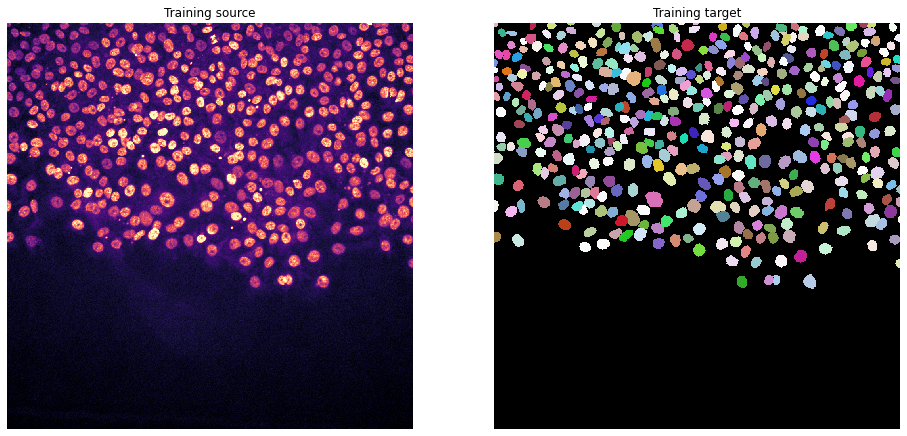

In [5]:
#@markdown ###Path to training images: 
Training_source = "/content/gdrive/MyDrive/Stardist/Training - Images" #@param {type:"string"}
#aka,training images

Training_target = "/content/gdrive/MyDrive/Stardist/Training - Masks" #@param {type:"string"}
#aka,training masks

#@markdown ### Model name and path:
model_name = "2023" #@param {type:"string"}
model_path = "/content/gdrive/MyDrive/my model path" #@param {type:"string"}

#@markdown ### Other parameters for training:
number_of_epochs =   1#@param {type:"number"}

#by defualt model_choice is empty which leads to train from scractch if section 3.2. is left out.

#@markdown ###Advanced Parameters
Use_Default_Advanced_Parameters = True #@param {type:"boolean"}


#@markdown ###If not, please input:
center = 'medoid'#@param ['medoid', 'approximate-medoid', 'centroid']
Nb_images_for_test = 2 #@param {type:"number"}
number_of_steps = 0#@param {type:"number"}
patch_size =  64#@param {type:"number"}
batch_size = 16 #@param {type:"number"}
percentage_validation =  10 #@param {type:"number"}
initial_learning_rate = 0.0005 #@param {type:"number"}

#Check what this does
Verbose = False

if (Use_Default_Advanced_Parameters): 
  print ('--------------------------------------------------------------------------------------------------------')
  print("Default advanced parameters enabled")
  center = 'medoid'
  Nb_images_for_test = 2
  number_of_steps = 0
  patch_size = 64
  batch_size = 6  
  percentage_validation = 10  
  initial_learning_rate = 0.0005

subset = percentage_validation/100

#here we check that no model with the same name already exist, if so print a warning

if os.path.exists(model_path+'/'+model_name):
  #print(bcolors.WARNING +"!! WARNING: "+model_name+" already exists and will be deleted !!")
  print(bcolors.WARNING +"To continue training "+model_name+", choose a new model_name here, and load "+model_name+" in section 3.3"+W)
  print ('--------------------------------------------------------------------------------------------------------')

# This will open a randomly chosen dataset input image
random_choice = random.choice(os.listdir(Training_target))
x = imread(Training_source+"/"+random_choice)

n_channel = 1 if x.ndim == 2 else x.shape[-1]

# Here we disable pre-trained model by default (in case the next cell is not ran)
Use_pretrained_model = False

# Here we disable data augmentation by default (in case the cell is not ran)
Use_Data_augmentation = False

#============================================================

# Here we count the number of files in the training source folder
Images_Filelist = os.listdir(Training_source)
Images_number_files = len(Images_Filelist)
print ('--------------------------------------------------------------------------------------------------------')
print ('The Number of files in Images folder:', Images_number_files)

# Here we count the number of files in the training target folder
Mask_Filelist = os.listdir(Training_target)
Mask_number_files = len(Mask_Filelist)
print ('--------------------------------------------------------------------------------------------------------')
print ('The Number of files in Masks folder:', Mask_number_files)

# Here we count the number of file to use for validation
Mask_for_validation = int((Mask_number_files)/percentage_validation)
print ('--------------------------------------------------------------------------------------------------------')
print ('The number of files to use for validation:', Mask_for_validation)

#============================================================

# At least 2 masks for validation
if Mask_for_validation == 0:
  Mask_for_validation = 2
if Mask_for_validation == 1:
  Mask_for_validation = 2

#============================================================

#a failsafe to check that enough images are available in the training source folder

len_list_source = len (os.listdir(os.path.join(Training_source)))
len_list_target = len (os.listdir(os.path.join(Training_target)))

abs_difference = abs(len_list_source-len_list_target)

if len_list_source-len_list_target < 0:
    print ('--------------------------------------------------------------------------------------------------------')
    print (color.RED + 'Number of Masks greater than Images! please be advised that, there are', abs_difference, 'more snapshots in Masks folder.' + color.END)
    print ('--------------------------------------------------------------------------------------------------------')

if len_list_source-len_list_target > 0:
    print ('--------------------------------------------------------------------------------------------------------')
    print (color.RED + 'Number of Images greater than Masks! please be advised that, there are', abs_difference, 'more snapshots in Images folder.' + color.END)
    print ('--------------------------------------------------------------------------------------------------------')

if len_list_source-len_list_target == 0:
    print ('--------------------------------------------------------------------------------------------------------')
    print (color.GREEN + 'Images and Masks are equally distributed, we are good to go!' + color.END)
    print ('--------------------------------------------------------------------------------------------------------')

#=============================================================

# Here we check the image dimensions
Image_Y = x.shape[0]
Image_X = x.shape[1]
print('Loaded images (width, length) =', x.shape,";", n_channel, "channel")

#=============================================================

#Hyperparameters failsafes

# Here we check that patch_size is smaller than the smallest xy dimension of the image 

if patch_size > min(Image_Y, Image_X):
  patch_size = min(Image_Y, Image_X)
  print ('--------------------------------------------------------------------------------------------------------')
  print(bcolors.WARNING + " Your chosen patch_size is bigger than the xy dimension of your image; therefore the patch_size chosen is now:",patch_size)

if patch_size > 2048:
  patch_size = 2048
  print ('--------------------------------------------------------------------------------------------------------')
  print(bcolors.WARNING + " Your image dimension is large; therefore the patch_size chosen is now:",patch_size)

# Here we check that the patch_size is divisible by 16
if not patch_size % 16 == 0:
    patch_size = ((int(patch_size / 16)-1) * 16)
    print(bcolors.WARNING + " Your chosen patch_size is not divisible by 8; therefore the patch_size chosen is:",patch_size)

#=============================================================
try:
    assert center in {'medoid', 'approximate-medoid', 'centroid'}
    print ('--------------------------------------------------------------------------------------------------------')
    print("Spatial Embedding Location chosen as : {}".format(center))
except AssertionError as e:
    e.args += ('Please specify center as one of : {"medoid", "approximate-medoid", "centroid"}', 42)
    raise

print ('--------------------------------------------------------------------------------------------------------')
print("Parameters initiated.")
#============================================================

# Here we open will randomly chosen input and output image
random_choice = random.choice(os.listdir(Training_source))
print ('--------------------------------------------------------------------------------------------------------')
print('Test snapshots below:', random.choice(os.listdir(Training_source)))
print ('--------------------------------------------------------------------------------------------------------')

x = imread(Training_source+"/"+random_choice)
os.chdir(Training_target)
y = imread(Training_target+"/"+random_choice)

#===========================================================

#Here we use a simple normalisation strategy to visualise the image
norm = simple_norm(x, percent = 99)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, interpolation='nearest', norm=norm, cmap='magma')
plt.title('Training source')
plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(y, interpolation='nearest', cmap=lbl_cmap)
plt.title('Training target')
plt.axis('off');
plt.savefig('/content/TrainingDataExample_EmbedSeg2D.png',bbox_inches='tight',pad_inches=0)

#==========================================================


## **3.2. Data augmentation**
---
<font size = 4>

<font size = 4>Data augmentation can improve training progress by amplifying differences in the dataset. This can be useful if the available dataset is small since, in this case, it is possible that a network could quickly learn every example in the dataset (overfitting), without augmentation. Augmentation is not necessary for training and if your training dataset is large you should disable it.

<font size = 4> **However, data augmentation is not a magic solution and may also introduce issues. Therefore, we recommend that you train your network with and without augmentation, and use the QC section to validate that it improves overall performances.** 

<font size = 4>Data augmentation is performed here by [Augmentor.](https://github.com/mdbloice/Augmentor)

<font size = 4>[Augmentor](https://github.com/mdbloice/Augmentor) was described in the following article:

<font size = 4>Marcus D Bloice, Peter M Roth, Andreas Holzinger, Biomedical image augmentation using Augmentor, Bioinformatics, https://doi.org/10.1093/bioinformatics/btz259

<font size = 4>**Please also cite this original paper when publishing results obtained using this notebook with augmentation enabled.** 

In [ ]:
#Data augmentation

Use_Data_augmentation = False #@param {type:"boolean"}

if Use_Data_augmentation:
  !pip -q install Augmentor
  import Augmentor


#@markdown ####Choose a factor by which you want to multiply your original dataset

Multiply_dataset_by = 1 #@param {type:"slider", min:1, max:30, step:1}

Save_augmented_images = False #@param {type:"boolean"}

Saving_path = "" #@param {type:"string"}


Use_Default_Augmentation_Parameters = True #@param {type:"boolean"}
#@markdown ###If not, please choose the probability of the following image manipulations to be used to augment your dataset (1 = always used; 0 = disabled ):

#@markdown ####Mirror and rotate images
rotate_90_degrees = 0 #@param {type:"slider", min:0, max:1, step:0.1}

rotate_270_degrees = 0 #@param {type:"slider", min:0, max:1, step:0.1}

flip_left_right = 0 #@param {type:"slider", min:0, max:1, step:0.1}

flip_top_bottom = 0 #@param {type:"slider", min:0, max:1, step:0.1}

#@markdown ####Random image Zoom

random_zoom = 0 #@param {type:"slider", min:0, max:1, step:0.1}

random_zoom_magnification = 0 #@param {type:"slider", min:0, max:1, step:0.1}

#@markdown ####Random image distortion

random_distortion = 0 #@param {type:"slider", min:0, max:1, step:0.1}


#@markdown ####Image shearing  

image_shear = 0 #@param {type:"slider", min:0, max:1, step:0.1}
max_image_shear = 1 #@param {type:"slider", min:1, max:25, step:1}

if Use_Default_Augmentation_Parameters:
  rotate_90_degrees = 0.5
  rotate_270_degrees = 0.5
  flip_left_right = 0.5
  flip_top_bottom = 0.5

  if not Multiply_dataset_by >5:
    random_zoom = 0
    random_zoom_magnification = 0.9
    random_distortion = 0
    image_shear = 0
    max_image_shear = 10

  if Multiply_dataset_by >5:
    random_zoom = 0.1
    random_zoom_magnification = 0.9
    random_distortion = 0.5
    image_shear = 0.2
    max_image_shear = 5


  if Multiply_dataset_by >25:
    random_zoom = 0.5
    random_zoom_magnification = 0.8
    random_distortion = 0.5
    image_shear = 0.5
    max_image_shear = 20


list_files = os.listdir(Training_source)
Nb_files = len(list_files)

Nb_augmented_files = (Nb_files * Multiply_dataset_by)

if Use_Data_augmentation:
  print("Data augmentation enabled")
# Here we set the path for the various folder were the augmented images will be loaded

# All images are first saved into the augmented folder
  #Augmented_folder = "/content/Augmented_Folder"
  
  if not Save_augmented_images:
    Saving_path= "/content"

  Augmented_folder =  Saving_path+"/Augmented_Folder"
  if os.path.exists(Augmented_folder):
    shutil.rmtree(Augmented_folder)
  os.makedirs(Augmented_folder)

  #Training_source_augmented = "/content/Training_source_augmented"
  Training_source_augmented = Saving_path+"/Training_source_augmented"

  if os.path.exists(Training_source_augmented):
    shutil.rmtree(Training_source_augmented)
  os.makedirs(Training_source_augmented)

  #Training_target_augmented = "/content/Training_target_augmented"
  Training_target_augmented = Saving_path+"/Training_target_augmented"

  if os.path.exists(Training_target_augmented):
    shutil.rmtree(Training_target_augmented)
  os.makedirs(Training_target_augmented)


# Here we generate the augmented images
#Load the images
  p = Augmentor.Pipeline(Training_source, Augmented_folder)

#Define the matching images
  p.ground_truth(Training_target)
#Define the augmentation possibilities
  if not rotate_90_degrees == 0:
    p.rotate90(probability=rotate_90_degrees)
  
  if not rotate_270_degrees == 0:
    p.rotate270(probability=rotate_270_degrees)

  if not flip_left_right == 0:
    p.flip_left_right(probability=flip_left_right)

  if not flip_top_bottom == 0:
    p.flip_top_bottom(probability=flip_top_bottom)

  if not random_zoom == 0:
    p.zoom_random(probability=random_zoom, percentage_area=random_zoom_magnification)
 
  if not random_distortion == 0:
    p.random_distortion(probability=random_distortion, grid_width=4, grid_height=4, magnitude=8)

  if not image_shear == 0:
    p.shear(probability=image_shear,max_shear_left=20,max_shear_right=20)
  

  p.sample(int(Nb_augmented_files))

  print(int(Nb_augmented_files),"matching images generated")

# Here we sort through the images and move them back to augmented trainning source and targets folders

  augmented_files = os.listdir(Augmented_folder)

  for f in augmented_files:

    if (f.startswith("_groundtruth_(1)_")):
      shortname_noprefix = f[17:]
      shutil.copyfile(Augmented_folder+"/"+f, Training_target_augmented+"/"+shortname_noprefix) 
    if not (f.startswith("_groundtruth_(1)_")):
      shutil.copyfile(Augmented_folder+"/"+f, Training_source_augmented+"/"+f)
      

  for filename in os.listdir(Training_source_augmented):
    os.chdir(Training_source_augmented)
    os.rename(filename, filename.replace('_original', ''))
  
  #Here we clean up the extra files
  shutil.rmtree(Augmented_folder)

if not Use_Data_augmentation:
  print(bcolors.WARNING+"Data augmentation disabled") 





## **3.3. Using weights from a pre-trained model as initial weights** 
---
<font size = 4>  Here, you can set the the path to a pre-trained model from which the weights can be extracted and used as a starting point for this training session. **This pre-trained model needs to be an EmbedSeg (2D) model**. 

<font size = 4> This option allows you to perform training over multiple Colab runtimes or to do transfer learning using models trained outside of ZeroCostDL4Mic. **You do not need to run this section if you want to train a network from scratch**.

<font size = 4> In order to continue training from the point where the pre-trained model left off, it is adviseable to also **load the learning rate** that was used when the training ended. This is automatically saved for models trained with ZeroCostDL4Mic and will be loaded here. If no learning rate can be found in the model folder provided, the default learning rate will be used. 

In [ ]:
# @markdown ##Loading weights from a pre-trained network

Use_pretrained_model = False #@param {type:"boolean"}

pretrained_model_choice = "Model_from_file" #@param ["Model_from_file"]      

#pretrained_model_choice = "bbbc010-2012" #@param ["Model_from_file","bbbc010-2012", "dsb-2018", "usiigaci-2017"]      


Weights_choice = "best_IoU_model" #@param ["last", "best_IoU_model"]


#@markdown ###If you chose "Model_from_file", please provide the path to the model folder:
pretrained_model_path = "" #@param {type:"string"}

#Here we define the loaded model name and path
pretrained_model_name = os.path.basename(pretrained_model_path)

# --------------------- Check if we load a previously trained model ------------------------
if Use_pretrained_model:

# --------------------- Load the model from the choosen path ------------------------
  if pretrained_model_choice == "Model_from_file":
    if Weights_choice == "best_IoU_model":
      h5_file_path = os.path.join(pretrained_model_path, "best_iou_model.pth")
    if Weights_choice == "last":
      h5_file_path = os.path.join(pretrained_model_path, "checkpoint.pth")


# --------------------- Download the a model provided in the XXX ------------------------

  # --------------------- Here we delete the pretrained model if it already exist ------------------------

  else:
    pretrained_models = data_dir+'/'+model_name+"/Pretrained_models"+'/'+pretrained_model_choice

    if os.path.exists(pretrained_models):
      shutil.rmtree(pretrained_models)
      print(color.GREEN+'--------------------------------------------------------------------------------------------------------------------'+color.END)
    os.makedirs(pretrained_models)
    url = os.path.join('https://github.com/juglab/EmbedSeg/raw/main/pretrained_models/', pretrained_model_choice,'best_iou_model.pth')
    urllib.request.urlretrieve(url, data_dir+'/'+model_name +'/Pretrained_models/'+pretrained_model_choice+'/best_iou_model.pth')

    url = os.path.join('https://raw.githubusercontent.com/juglab/EmbedSeg/main/pretrained_models/', pretrained_model_choice,'data_properties.json')
    urllib.request.urlretrieve(url, data_dir+'/'+model_name +'/Pretrained_models/'+pretrained_model_choice+'/data_properties.json')

    h5_file_path = data_dir+'/'+model_name +'/Pretrained_models/'+pretrained_model_choice+'/best_iou_model.pth'
    
    print('  ',pretrained_model_choice, 'model successfully downloaded and saved at:\n\n ', color.BLUE+ pretrained_models +color.END)
    print(color.GREEN+'--------------------------------------------------------------------------------------------------------------------'+color.END)
 

# --------------------- Check the model exist ------------------------
# If the model path chosen does not contain a pretrain model then use_pretrained_model is disabled, 
  if not os.path.exists(h5_file_path):
    print(bcolors.WARNING+'WARNING: weights_last.h5 pretrained model does not exist')
    Use_pretrained_model = False

  
# If the model path contains a pretrain model, we load the training rate, 
  if os.path.exists(h5_file_path):
#Here we check if the learning rate can be loaded from the quality control folder
    if os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):

      with open(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv'),'r') as csvfile:
        csvRead = pd.read_csv(csvfile, sep=',')
        #print(csvRead)
    
        if "learning rate" in csvRead.columns: #Here we check that the learning rate column exist (compatibility with model trained un ZeroCostDL4Mic bellow 1.4)
          print("pretrained network learning rate found")
          #find the last learning rate
          lastLearningRate = csvRead["learning rate"].iloc[-1]
          #Find the learning rate corresponding to the lowest validation loss
          min_val_loss = csvRead[csvRead['val_loss'] == min(csvRead['val_loss'])]
          #print(min_val_loss)
          bestLearningRate = min_val_loss['learning rate'].iloc[-1]

          if Weights_choice == "last":
            print('Last learning rate: '+str(lastLearningRate))

          if Weights_choice == "best":
            print('Learning rate of best validation loss: '+str(bestLearningRate))

        if not "learning rate" in csvRead.columns: #if the column does not exist, then initial learning rate is used instead
          bestLearningRate = initial_learning_rate
          lastLearningRate = initial_learning_rate
          print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(bestLearningRate)+' will be used instead' + W)

#Compatibility with models trained outside ZeroCostDL4Mic but default learning rate will be used
    if not os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):
      print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(initial_learning_rate)+' will be used instead'+ W)
      bestLearningRate = initial_learning_rate
      lastLearningRate = initial_learning_rate


# Display info about the pretrained model to be loaded (or not)
if Use_pretrained_model:
  print('Weights found in:')
  print(h5_file_path)
  print('will be loaded prior to training.')

else:
  print(bcolors.WARNING+'No pretrained nerwork will be used.')



# **4. Train the network**
---

## **4.1. Prepare the training data and model for training**
---
<font size = 4>Here, we use the information from 3. to build the model and convert the training data into a suitable format for training.

In [6]:
#@markdown ##Create the model and dataset objects

# --------------------- Here we delete the model folder if it already exist ------------------------

if os.path.exists(model_path+'/'+model_name):
  print(bcolors.WARNING +"!! WARNING: Model folder already exists and has been removed !!" + W)
  shutil.rmtree(model_path+'/'+model_name)
os.makedirs(model_path+'/'+model_name)
# ------------------------------------------------------------

# Choosing the right data 
if Use_Data_augmentation:
  Training_source_dir = Training_source_augmented
  Training_target_dir = Training_target_augmented

if not Use_Data_augmentation:
  Training_source_dir = Training_source
  Training_target_dir = Training_target

#Here we split the training dataset between training, validation and test and we neatly organise everything into folders
# Everything is copied in the /Content Folder

print('--------------------------------------------------------------------------------------------------------')
print('Creating a temporary directory...')

Training_source_temp = data_dir+"/"+model_name+"/train/images"
if os.path.exists(Training_source_temp):
  shutil.rmtree(Training_source_temp)
os.makedirs(Training_source_temp)

Training_target_temp = data_dir+"/"+model_name+"/train/masks"
if os.path.exists(Training_target_temp):
  shutil.rmtree(Training_target_temp)
os.makedirs(Training_target_temp)

Validation_source_temp = data_dir+"/"+model_name+"/val/images"
if os.path.exists(Validation_source_temp):
  shutil.rmtree(Validation_source_temp)
os.makedirs(Validation_source_temp)

Validation_target_temp = data_dir+"/"+model_name+"/val/masks"
if os.path.exists(Validation_target_temp):
  shutil.rmtree(Validation_target_temp)
os.makedirs(Validation_target_temp)

Test_source_temp = data_dir+"/"+model_name+"/test/images"
if os.path.exists(Test_source_temp):
  shutil.rmtree(Test_source_temp)
os.makedirs(Test_source_temp)

Test_target_temp = data_dir+"/"+model_name+"/test/masks"
if os.path.exists(Test_target_temp):
  shutil.rmtree(Test_target_temp)
os.makedirs(Test_target_temp)


print('--------------------------------------------------------------------------------------------------------')

#List the files present in the training dataset:

list_source = os.listdir(os.path.join(Training_source_dir))
list_target = os.listdir(os.path.join(Training_target_dir))

print('Splitting your dataset...')
print('--------------------------------------------------------------------------------------------------------')

#Move files into the temporary source and target directories:

for f in os.listdir(os.path.join(Training_source_dir)):
  shutil.copy(Training_source_dir+"/"+f, Training_source_temp+"/"+f)

for p in os.listdir(os.path.join(Training_target_dir)):
  shutil.copy(Training_target_dir+"/"+p, Training_target_temp+"/"+p)

print('Moving images & masks to be used for validation and test to the temporary directory...')
print('--------------------------------------------------------------------------------------------------------')

print('Depending on your data size, this can take time!')
print('--------------------------------------------------------------------------------------------------------')

#===============================================================================

#Here we move images to be used for validation
for i in range(Mask_for_validation):    
  shutil.copy(Training_source_temp+"/"+list_source[i], Validation_source_temp+"/"+list_source[i])
  shutil.copy(Training_target_temp+"/"+list_target[i], Validation_target_temp+"/"+list_target[i])

list_source_temp = os.listdir(os.path.join(Training_source_temp))
list_target_temp = os.listdir(os.path.join(Training_target_temp))
print('--------------------------------------------------------------------------------------------------------')

#===============================================================================
#Here we move images to be used for test
for i in range(Nb_images_for_test):    
  shutil.copy(Training_source_temp+"/"+list_source_temp[i], Test_source_temp+"/"+list_source_temp[i])
  shutil.copy(Training_target_temp+"/"+list_target_temp[i], Test_target_temp+"/"+list_target_temp[i])

print('Moving done! We are good to go ✔️✔️✔️')
print('--------------------------------------------------------------------------------------------------------')

#2D notebook so always false
one_hot = False

print('Analysing your dataset, this will take a few minutes... maybe time for ☕ & 🍪')

data_properties_dir = get_data_properties(data_dir, model_name, train_val_name=['train'], 
                                          test_name=['test'], mode='2d', one_hot=one_hot)

# Here we check the type of data to choose the correct normalisation
# Check this works with multichannel

maxElement = np.amax(x)
if maxElement > 255:
  data_properties_dir['data_type']='16-bit'
  normalization_factor = 65535

if maxElement > 1 and maxElement < 256:
  data_properties_dir['data_type']='8-bit'
  normalization_factor = 255 

if maxElement < 1.1:
  data_properties_dir['data_type']='32-bit'
  normalization_factor = 1


with open(model_path+'/'+model_name+'/data_properties.json', 'w') as outfile: #creates the data_properties.json and with "as" we give it a name, which is "outfile" in this context
    json.dump(data_properties_dir, outfile)
    print("Dataset properies of the `{}` dataset is saved to `data_properties.json`".format(model_name))

print('Done✔️')

print('--------------------------------------------------------------------------------------------------------')

#Here we create a directory that will contain the crops
crops_dir = data_dir+"/"+model_name+"/crops"
if os.path.exists(crops_dir):
  shutil.rmtree(crops_dir)
os.makedirs(crops_dir)

data_subsets = ['train', 'val']  
crop_size = patch_size

print('Generating patches, this will take a few minutes.')

for data_subset in data_subsets:
    image_dir = os.path.join(data_dir, model_name, data_subset, 'images')
    instance_dir = os.path.join(data_dir, model_name, data_subset, 'masks')
    image_names = sorted(glob(os.path.join(image_dir, '*.tif'))) 
    instance_names = sorted(glob(os.path.join(instance_dir, '*.tif')))  
    for i in tqdm(np.arange(len(image_names))):
        if one_hot:
            process_one_hot(image_names[i], instance_names[i], os.path.join(crops_dir, model_name), data_subset, crop_size, center, one_hot = one_hot)
        else:
            process(image_names[i], instance_names[i], os.path.join(crops_dir, model_name), data_subset, crop_size, center, one_hot=one_hot)
    print("Cropping of images, instances and centre_images for data_subset = `{}` done!".format(data_subset))

print('Done✔️')

print('--------------------------------------------------------------------------------------------------------')

# Here we count the number of available patches/crops

list_train_crops = os.listdir(crops_dir+"/"+model_name+"/train/images")
list_val_crops = os.listdir(crops_dir+"/"+model_name+"/val/images")

Crop_number_train = len(list_train_crops)
Crop_number_val = len(list_val_crops)

if number_of_steps == 0:
  train_size = Crop_number_train
else:
  train_size = number_of_steps*batch_size


print("Number of training patches: ",Crop_number_train,"⬅️")
print("Number of validation patches: ",Crop_number_val, "⬅️")
print("Number of steps per EPOCH: ",train_size, "⬅️")
print('--------------------------------------------------------------------------------------------------------')

print("Model Name chosen as : {}. \nTrain-Val images-masks-center-images will be accessed from : {}".format(model_name, data_dir))
print('--------------------------------------------------------------------------------------------------------')

try:
    assert center in {'medoid', 'approximate-medoid', 'centroid'}
    print("Spatial Embedding Location chosen as : {}".format(center))
except AssertionError as e:
    e.args += ('Please specify center as one of : {"medoid", "approximate-medoid", "centroid"}', 42)
    raise
print('--------------------------------------------------------------------------------------------------------')

if os.path.isfile(model_path+'/'+model_name+'/data_properties.json'): 
    with open(model_path+'/'+model_name+'/data_properties.json') as json_file:
        data = json.load(json_file)
        one_hot, data_type, foreground_weight, n_y, n_x = data['one_hot'], data['data_type'], int(data['foreground_weight']), int(data['n_y']), int(data['n_x'])

#===============================================================================

train_batch_size = batch_size 
virtual_train_batch_multiplier = 1
train_dataset_dict = create_dataset_dict(data_dir = crops_dir, 
                                         project_name = model_name,  
                                         center = center, 
                                         size = train_size, 
                                         batch_size = train_batch_size, 
                                         virtual_batch_multiplier = virtual_train_batch_multiplier, 
                                        #  normalization_factor= normalization_factor,
                                         one_hot = one_hot,
                                         type = 'train')

print('--------------------------------------------------------------------------------------------------------')

val_size = Crop_number_val   
val_batch_size = batch_size
virtual_val_batch_multiplier = 1
val_dataset_dict = create_dataset_dict(data_dir = crops_dir, 
                                       project_name = model_name, 
                                       center = center, 
                                       size = val_size, 
                                       batch_size = val_batch_size, 
                                       virtual_batch_multiplier = virtual_val_batch_multiplier,
                                      #  normalization_factor= normalization_factor,
                                       one_hot = one_hot,
                                       type ='val',)

print('--------------------------------------------------------------------------------------------------------')
input_channels = 1 # To create an option to choose

model_dict = create_model_dict(input_channels = input_channels)
print('--------------------------------------------------------------------------------------------------------')
loss_dict = create_loss_dict(foreground_weight = foreground_weight)
print('--------------------------------------------------------------------------------------------------------')

display = True
display_embedding = True

# --------------------- Using pretrained model ------------------------
# Load the pretrained weights 
if Use_pretrained_model:
  resume_path = h5_file_path

else:
  resume_path  = None
# --------------------- ---------------------- ------------------------

configs = create_configs(n_epochs = number_of_epochs,
                         one_hot = one_hot,
                         display = display, 
                         display_embedding = display_embedding,
                         resume_path = resume_path, 
                         save_dir = model_path+'/'+model_name,
                         train_lr = initial_learning_rate, 
                         n_y = n_y, 
                         n_x = n_x,)

print('--------------------------------------------------------------------------------------------------------')

if os.path.exists(Test_source_temp):
  shutil.rmtree(Test_source_temp)
  
if os.path.exists(Test_target_temp):
  shutil.rmtree(Test_target_temp)


--------------------------------------------------------------------------------------------------------
Creating a temporary directory...
--------------------------------------------------------------------------------------------------------
Splitting your dataset...
--------------------------------------------------------------------------------------------------------
Moving images & masks to be used for validation and test to the temporary directory...
--------------------------------------------------------------------------------------------------------
Depending on your data size, this can take time!
--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------
Moving done! We are good to go ✔️✔️✔️
--------------------------------------------------------------------------------------------------------
Analysing your dataset, this wi

100%|██████████| 45/45 [00:00<00:00, 500.82it/s]


Foreground weight of the `2023` dataset set equal to 10.000


100%|██████████| 45/45 [00:43<00:00,  1.04it/s]


Minimum object size of the `2023` dataset is equal to 18
Mean object size of the `2023` dataset is equal to 476.8332983707433
Maximum object size of the `2023` dataset is equal to 1710
Average object size of the `2023` dataset along `x` is equal to 23.767
Std. dev object size of the `2023` dataset along `x` is equal to 5.611
Average object size of the `2023` dataset along `y` is equal to 23.972
Std. dev object size of the `2023` dataset along `y` is equal to 5.338


100%|██████████| 2/2 [00:00<00:00, 269.53it/s]


Tile size of the `2023` dataset set equal to (1024, 1024)


100%|██████████| 45/45 [00:00<00:00, 206.93it/s]


Average background intensity of the `2023` dataset set equal to 298.813
Dataset properies of the `2023` dataset is saved to `data_properties.json`
Done✔️
--------------------------------------------------------------------------------------------------------
Generating patches, this will take a few minutes.


  0%|          | 0/45 [00:00<?, ?it/s]

Created new directory : /content/data_dir/2023/crops/2023/train/images/
Created new directory : /content/data_dir/2023/crops/2023/train/masks/
Created new directory : /content/data_dir/2023/crops/2023/train/center-medoid/


100%|██████████| 45/45 [03:50<00:00,  5.12s/it]


Cropping of images, instances and centre_images for data_subset = `train` done!


  0%|          | 0/4 [00:00<?, ?it/s]

Created new directory : /content/data_dir/2023/crops/2023/val/images/
Created new directory : /content/data_dir/2023/crops/2023/val/masks/
Created new directory : /content/data_dir/2023/crops/2023/val/center-medoid/


100%|██████████| 4/4 [00:22<00:00,  5.53s/it]

Cropping of images, instances and centre_images for data_subset = `val` done!
Done✔️
--------------------------------------------------------------------------------------------------------
Number of training patches:  14301 ⬅️
Number of validation patches:  1192 ⬅️
Number of steps per EPOCH:  14301 ⬅️
--------------------------------------------------------------------------------------------------------
Model Name chosen as : 2023. 
Train-Val images-masks-center-images will be accessed from : /content/data_dir
--------------------------------------------------------------------------------------------------------
Spatial Embedding Location chosen as : medoid
--------------------------------------------------------------------------------------------------------
`train_dataset_dict` dictionary successfully created with: 
 -- train images accessed from /content/data_dir/2023/crops/2023/train/images, 
 -- number of images per epoch equal to 14301, 
 -- batch size set at 6, 
------------

## **4.2. Start Training**
---

<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches. Another way circumvent this is to save the parameters of the model after training and start training again from this point.

<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder as all data can be erased at the next training if using the same folder.

Training will be initiated from scratch...
--------------------------------------------------------------------------------------------------------------------
2-D `train` dataloader created! Accessing data from /content/data_dir/2023/crops/2023/train/
Number of images in `train` directory is 14301
Number of instances in `train` directory is 14301
Number of center images in `train` directory is 14301
*************************
2-D `val` dataloader created! Accessing data from /content/data_dir/2023/crops/2023/val/
Number of images in `val` directory is 1192
Number of instances in `val` directory is 1192
Number of center images in `val` directory is 1192
*************************
Creating Branched Erfnet with [4, 1] outputs
Initialize last layer with size:  torch.Size([16, 4, 2, 2])
*************************
Created spatial emb loss function with: n_sigma: 2, foreground_weight: 10
*************************
Created logger with keys:  ('train', 'val', 'iou')
Starting epoch 0
learning rate:

100%|██████████| 199/199 [00:34<00:00,  5.74it/s]


===> train loss: 0.73
===> val loss: 2.10, val iou: 0.51
=> saving checkpoint
--------------------------------------------------------------------------------------------------------------------
Training done.
____________________________________________________________________________________________________________________

Time elapsed: 0.0 hour(s) 11.0 min(s) 24 sec(s)
____________________________________________________________________________________________________________________


'/content/gdrive/MyDrive/my model path/2023/Quality Control/training_evaluation.csv'

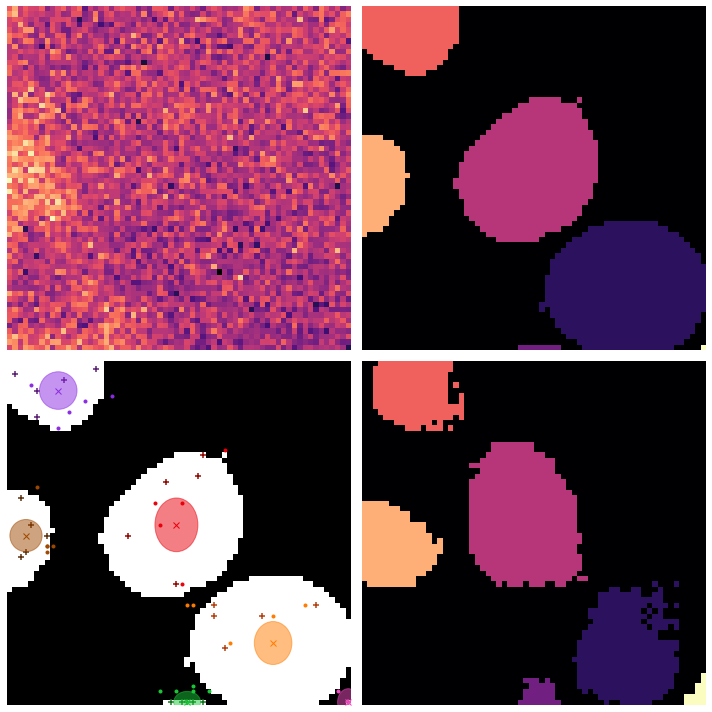

In [7]:
#@markdown ##Start Training
from datetime import datetime
start = time.time()
#----------------------------------------------------------------------- body ---------------------------------------------------------------------------------------
#=============================================================== train from scratch ===============================================================================

print("Training will be initiated from scratch...")
print(color.GREEN+'--------------------------------------------------------------------------------------------------------------------'+color.END)

# Start training:
new_cmap = 'magma'

#begin_training has a built in network optimizer 
begin_training(train_dataset_dict, val_dataset_dict, model_dict, loss_dict, configs, color_map=new_cmap)
print(color.GREEN+'--------------------------------------------------------------------------------------------------------------------'+color.END)
print("Training done.")

print(color.GREEN+'____________________________________________________________________________________________________________________\n'+color.END)
# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")
print(color.GREEN+'____________________________________________________________________________________________________________________'+color.END)

# Here we create the quality control folder
if os.path.exists(model_path+"/"+model_name+"/Quality Control"):
  shutil.rmtree(model_path+"/"+model_name+"/Quality Control")

# Here we copy the training_evaluation to the quality control folder
os.makedirs(model_path+"/"+model_name+"/Quality Control")
shutil.copy(model_path+"/"+model_name+"/loss.csv", model_path+"/"+model_name+"/Quality Control/training_evaluation.csv")


#=================================================================== Export pdf =============================================================================

#pdf_export(trained = True, augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)

#===============================================================================


# **5. Evaluate your model**
---

<font size = 4>This section allows the user to perform important quality checks on the validity and generalisability of the trained model. 

<font size = 4>**We highly recommend to perform quality control on all newly trained models.**



In [ ]:
# model name and path
#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please indicate the model you want to evaluate:
QC_model_choice = "Model_from_file" #@param ["Model_from_file","bbbc010-2012", "dsb-2018", "usiigaci-2017"]      

QC_model_folder = "" #@param {type:"string"}

#@markdown ###If using the bbbc010-2012", "dsb-2018" or "usiigaci-2017" models, please indicate where you want to save the results:
Saving_path = "" #@param {type:"string"}

#Here we define the loaded model name and path
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)

full_QC_model_path = QC_model_path+'/'+QC_model_name+'/'

if (Use_the_current_trained_model): 
  QC_model_name = model_name
  QC_model_path = model_path
  Saving_path = QC_model_folder

if QC_model_choice == "Model_from_file":
  if os.path.exists(full_QC_model_path):
    print("The "+QC_model_name+" model will be evaluated")
    Saving_path = QC_model_folder
  else:  
    print(bcolors.WARNING + '!! WARNING: The chosen model does not exist !!')
    print('Please make sure you provide a valid model path and model name before proceeding further.')

else:
  QC_model_path = Saving_path
  QC_model_name = QC_model_choice
  QC_model_folder = Saving_path + "/"+QC_model_choice
  print("The "+QC_model_choice+" model will be evaluated")


if not Saving_path == "":
  if os.path.exists(QC_model_folder) == False:
    os.makedirs(QC_model_folder)
else:
  print(bcolors.WARNING+'!! WARNING: Indicate where you want to save the results')



## **5.1. Inspection of the loss function**
---

<font size = 4>It is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

<font size = 4>**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact noise patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

In [ ]:

#@markdown ##Play the cell to show a plot of training errors vs. epoch number

#------------------------Here we add lr to our csv file-------------------------


#-------------------------------------------------------------------------------

lossDataFromCSV = []
vallossDataFromCSV = []
bestiouDataFromCSV = []

if QC_model_choice == "Model_from_file":

  with open(QC_model_path+'/'+QC_model_name+'/Quality Control/training_evaluation.csv','r') as csvfile:
      csvRead = csv.reader(csvfile, delimiter=',')
      next(csvRead)
      for row in csvRead:
          lossDataFromCSV.append(float(row[1]))
          vallossDataFromCSV.append(float(row[2]))
          bestiouDataFromCSV.append(float(row[3]))       

  epochNumber = range(len(lossDataFromCSV))
  plt.figure(figsize=(15,10))

  plt.subplot(2,1,1)
  plt.plot(epochNumber,lossDataFromCSV,'lime', label='Training loss')
  plt.plot(epochNumber,vallossDataFromCSV,'deeppink', label='Validation loss')
  plt.plot(epochNumber,bestiouDataFromCSV,'dodgerblue', label='iou')

  plt.title('Training loss, validation loss and iou vs. epoch number (linear scale)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch number')
  plt.legend()

  plt.savefig(QC_model_path+'/'+QC_model_name+'/Quality Control/lossCurvePlots.png',bbox_inches='tight',pad_inches=0)
  plt.show()

else:
  print("The loss and validation curves are not available for this pre-trained model")



## **5.2. Error mapping and quality metrics estimation**
---
<font size = 4>This section will calculate the Intersection over Union score for all the images provided in the Source_QC_folder and Target_QC_folder ! The result for one of the image will also be displayed.

<font size = 4>The **Intersection over Union** (IuO) metric is a method that can be used to quantify the percent overlap between the target mask and your prediction output. **Therefore, the closer to 1, the better the performance.** This metric can be used to assess the quality of your model to accurately predict nuclei. 

<font size = 4>Here, the IuO is both calculated over the whole image and on a per-object basis. The value displayed below is the IuO value calculated over the entire image. The IuO value calculated on a per-object basis is used to calculate the other metrics displayed.

<font size = 4>“n_true” refers to the number of objects present in the ground truth image. “n_pred” refers to the number of objects present in the predicted image. 

<font size = 4>When a segmented object has an IuO value above 0.5 (compared to the corresponding ground truth), it is then considered a true positive. The number of “**true positives**” is available in the table below. The number of “false positive” is then defined as  “**false positive**” = “n_pred” - “true positive”. The number of “false negative” is defined as “false negative” = “n_true” - “true positive”.

<font size = 4>The mean_matched_score is the mean IoUs of matched true positives. The mean_true_score is the mean IoUs of matched true positives but normalized by the total number of ground truth objects. The panoptic_quality is calculated as described by [Kirillov et al. 2019](https://arxiv.org/abs/1801.00868).

<font size = 4>For more information about the other metric displayed, please consult the SI of the paper describing ZeroCostDL4Mic.

<font size = 4> The results can be found in the "*Quality Control*" folder which is located inside your "model_folder".

In [ ]:
#@markdown ##Choose the folders that contain your Quality Control dataset

Source_QC_folder = "" #@param{type:"string"}
Target_QC_folder = "" #@param{type:"string"}

#@markdown ### Other parameters:
Seed_threshold = 0.90#@param {type:"number"}

#Create a quality control Folder and check if the folder already exist

QC_quality_Control_folder = QC_model_path+"/"+QC_model_name+"/Quality Control"

if os.path.exists(QC_quality_Control_folder) == False:
  os.makedirs(QC_quality_Control_folder)


# Generate predictions from the Source_QC_folder and save them in the QC folder

QC_source_temp = data_dir+"/"+QC_model_name+"/test/images"
if os.path.exists(QC_source_temp):
  shutil.rmtree(QC_source_temp)
os.makedirs(QC_source_temp)

for f in os.listdir(os.path.join(Data_folder)):
  shutil.copy(Source_QC_folder+"/"+f, QC_source_temp+"/"+f)


if QC_model_choice == "Model_from_file":
  if os.path.exists(full_QC_model_path):
    print("The "+QC_model_name+" network will be used.")
  else:
    print(bcolors.WARNING+'!! WARNING: The chosen model does not exist !!'+W)
    print('Please make sure you provide a valid model path and model name before proceeding further.')

  QC_checkpoint_path = os.path.join(full_QC_model_path, 'best_iou_model.pth')
  with open(os.path.join(full_QC_model_path, 'data_properties.json')) as json_file:
        data = json.load(json_file)
        one_hot, data_type, min_object_size, n_y, n_x, avg_bg = data['one_hot'], data['data_type'], int(data['min_object_size']), int(data['n_y']), int(data['n_x']), float(data['avg_background_intensity'])

else:
  pretrained_model_dir = data_dir+"/"+QC_model_name+"/Pretrained_models"+"/"+Prediction_model_choice
  
  if os.path.exists(pretrained_model_dir):
    shutil.rmtree(pretrained_model_dir)
  os.makedirs(pretrained_model_dir)

  url = os.path.join('https://github.com/juglab/EmbedSeg/raw/main/pretrained_models/', Prediction_model_choice,'best_iou_model.pth')
  urllib.request.urlretrieve(url, pretrained_model_dir+'/best_iou_model.pth')

  url = os.path.join('https://raw.githubusercontent.com/juglab/EmbedSeg/main/pretrained_models/', Prediction_model_choice,'data_properties.json')
  urllib.request.urlretrieve(url, pretrained_model_dir+'/data_properties.json')

  QC_checkpoint_path = os.path.join(pretrained_model_dir, 'best_iou_model.pth')
  with open(os.path.join(pretrained_model_dir, 'data_properties.json')) as json_file:
        data = json.load(json_file)
        one_hot, data_type, min_object_size, n_y, n_x, avg_bg = data['one_hot'], data['data_type'], int(data['min_object_size']), int(data['n_y']), int(data['n_x']), float(data['avg_background_intensity'])


#saving and showing the results
tta = True
ap_val = 0.5
save_images = True
save_results = True
normalization_factor = 65535 if data_type=='16-bit' else 255
Verbose = False

#trained model weights
if os.path.exists(QC_checkpoint_path):
    print("model weights found at : {}".format(QC_checkpoint_path))
else:
    print("model weights were not found at the specified location!")

#Create test_configs dictionary from the above-specified parameters 
test_configs = create_test_configs_dict(data_dir = os.path.join(data_dir, QC_model_name),
                                        checkpoint_path = QC_checkpoint_path,
                                        tta = tta,                                         
                                        ap_val = ap_val,
                                        seed_thresh = Seed_threshold, 
                                        min_object_size = min_object_size, 
                                        save_images = save_images,
                                        save_results = save_results,
                                        save_dir = QC_quality_Control_folder,
                                        normalization_factor = normalization_factor,
                                        one_hot = one_hot,
                                        n_y = n_y,
                                        n_x = n_x,
                                        )
print(color.BLUE+'--------------------------------------------------------------------------------------------------------------------'+color.END)

begin_evaluating(test_configs, verbose = Verbose, avg_bg = avg_bg/normalization_factor)

# Here we start testing the differences between GT and predicted masks

with open(QC_model_path+"/"+QC_model_name+"/Quality Control/Quality_Control for "+QC_model_name+".csv", "w", newline='') as file:
  writer = csv.writer(file, delimiter=",")
  writer.writerow(["image","Prediction v. GT Intersection over Union", "false positive", "true positive", "false negative", "precision", "recall", "accuracy", "f1 score", "n_true", "n_pred", "mean_true_score", "mean_matched_score", "panoptic_quality"])  

  for n in os.listdir(Source_QC_folder):    
    if not os.path.isdir(os.path.join(Source_QC_folder,n)):
      print('Running QC on: '+n)
      test_input = io.imread(os.path.join(Source_QC_folder,n))
      test_prediction = io.imread(os.path.join(QC_model_path+"/"+QC_model_name+"/Quality Control/predictions",n))
      test_ground_truth_image = io.imread(os.path.join(Target_QC_folder, n))

      # Calculate the matching (with IoU threshold `thresh`) and all metrics
      stats = matching(test_ground_truth_image, test_prediction, thresh=0.5)

      #Convert pixel values to 0 or 255
      test_prediction_0_to_255 = test_prediction
      test_prediction_0_to_255[test_prediction_0_to_255>0] = 255

      #Convert pixel values to 0 or 255
      test_ground_truth_0_to_255 = test_ground_truth_image
      test_ground_truth_0_to_255[test_ground_truth_0_to_255>0] = 255

      # Intersection over Union metric
      intersection = np.logical_and(test_ground_truth_0_to_255, test_prediction_0_to_255)
      union = np.logical_or(test_ground_truth_0_to_255, test_prediction_0_to_255)
      iou_score =  np.sum(intersection) / np.sum(union)
      writer.writerow([n, str(iou_score), str(stats.fp), str(stats.tp), str(stats.fn), str(stats.precision), str(stats.recall), str(stats.accuracy), str(stats.f1), str(stats.n_true), str(stats.n_pred), str(stats.mean_true_score), str(stats.mean_matched_score), str(stats.panoptic_quality)])

from tabulate import tabulate

df = pd.read_csv (QC_model_path+"/"+QC_model_name+"/Quality Control/Quality_Control for "+QC_model_name+".csv")
print(tabulate(df, headers='keys', tablefmt='psql'))

from astropy.visualization import simple_norm

# ------------- For display ------------
print('--------------------------------------------------------------')
@interact
def show_QC_results(file = os.listdir(Source_QC_folder)):  

  plt.figure(figsize=(25,5))
  source_image = io.imread(os.path.join(Source_QC_folder, file))

  target_image = io.imread(os.path.join(Target_QC_folder, file), as_gray = True)
  prediction = io.imread(QC_model_path+"/"+QC_model_name+"/Quality Control/predictions/"+file, as_gray = True)

  stats = matching(prediction, target_image, thresh=0.5)

  target_image_mask = np.empty_like(target_image)
  target_image_mask[target_image > 0] = 255
  target_image_mask[target_image == 0] = 0
  
  prediction_mask = np.empty_like(prediction)
  prediction_mask[prediction > 0] = 255
  prediction_mask[prediction == 0] = 0

  intersection = np.logical_and(target_image_mask, prediction_mask)
  union = np.logical_or(target_image_mask, prediction_mask)
  iou_score =  np.sum(intersection) / np.sum(union)
  norm = simple_norm(source_image, percent = 99)

  #Input
  plt.subplot(1,4,1)
  plt.axis('off')
  plt.imshow(source_image, aspect='equal', norm=norm, cmap='magma', interpolation='nearest')
  plt.title('Input')

  #Ground-truth
  plt.subplot(1,4,2)
  plt.axis('off')
  plt.imshow(target_image_mask, aspect='equal', cmap='Greens')
  plt.title('Ground Truth')

  #Prediction
  plt.subplot(1,4,3)
  plt.axis('off')
  plt.imshow(prediction_mask, aspect='equal', cmap='Purples')
  plt.title('Prediction')

  #Overlay
  plt.subplot(1,4,4)
  plt.axis('off')
  plt.imshow(target_image_mask, cmap='Greens')
  plt.imshow(prediction_mask, alpha=0.5, cmap='Purples')
  plt.title('Ground Truth and Prediction, Intersection over Union:'+str(round(iou_score,3 )));
  plt.savefig(full_QC_model_path+'/Quality Control/QC_example_data.png',bbox_inches='tight',pad_inches=0)

#qc_pdf_export()

# **6. Using the trained model**

---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.



## **6.1 Generate prediction(s) from unseen dataset**
---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

---

<font size = 4>The current trained model (from section 4.3) can now be used to process images. If an older model needs to be used, please untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Prediction_folder** folder.

<font size = 4>**`Data_folder`:** This folder should contains the images that you want to predict using the network that you will train.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output ROI.

<font size = 4>**`Seed_threshold`:** This parameter allows considering only those pixels as potential instance-centres which have a seediness score greater than Seed_threshold.


In [ ]:
#@markdown ### Provide the path to your dataset and to the folder where the prediction will be saved (Result folder), then play the cell to predict output on your unseen images.
Data_folder = "" #@param {type:"string"}
Results_folder = "" #@param {type:"string"}

#@markdown ###model name and path
Prediction_model_choice = "Model_from_file" #@param ["Model_from_file","bbbc010-2012", "dsb-2018", "usiigaci-2017"]      

#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = False #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:
Prediction_model_folder = "" #@param {type:"string"}

#Here we find the loaded model name and parent path
Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)

#@markdown ### Other parameters:
Seed_threshold = 0.90#@param {type:"number"}

if (Use_the_current_trained_model): 
  print("Using current trained network")
  Prediction_model_name = model_name
  Prediction_model_path = model_path

full_Prediction_model_path = Prediction_model_path+'/'+Prediction_model_name+'/'

Test_source_temp = data_dir+"/"+Prediction_model_name+"/test/images"
if os.path.exists(Test_source_temp):
  shutil.rmtree(Test_source_temp)
os.makedirs(Test_source_temp)

for f in os.listdir(os.path.join(Data_folder)):
  shutil.copy(Data_folder+"/"+f, Test_source_temp+"/"+f)

if Prediction_model_choice == "Model_from_file":
  if os.path.exists(full_Prediction_model_path):
    print("The "+Prediction_model_name+" network will be used.")
  else:
    print(bcolors.WARNING+'!! WARNING: The chosen model does not exist !!'+W)
    print('Please make sure you provide a valid model path and model name before proceeding further.')

  checkpoint_path = os.path.join(Prediction_model_folder, 'best_iou_model.pth')
  with open(os.path.join(Prediction_model_folder, 'data_properties.json')) as json_file:
        data = json.load(json_file)
        one_hot, data_type, min_object_size, n_y, n_x, avg_bg = data['one_hot'], data['data_type'], int(data['min_object_size']), int(data['n_y']), int(data['n_x']), float(data['avg_background_intensity'])

else:
  pretrained_model_dir = data_dir+"/"+Prediction_model_name+"/Pretrained_models"+"/"+Prediction_model_choice
  
  if os.path.exists(pretrained_model_dir):
    shutil.rmtree(pretrained_model_dir)
  os.makedirs(pretrained_model_dir)

  url = os.path.join('https://github.com/juglab/EmbedSeg/raw/main/pretrained_models/', Prediction_model_choice,'best_iou_model.pth')
  urllib.request.urlretrieve(url, pretrained_model_dir+'/best_iou_model.pth')

  url = os.path.join('https://raw.githubusercontent.com/juglab/EmbedSeg/main/pretrained_models/', Prediction_model_choice,'data_properties.json')
  urllib.request.urlretrieve(url, pretrained_model_dir+'/data_properties.json')

  checkpoint_path = os.path.join(pretrained_model_dir, 'best_iou_model.pth')
  with open(os.path.join(pretrained_model_dir, 'data_properties.json')) as json_file:
        data = json.load(json_file)
        one_hot, data_type, min_object_size, n_y, n_x, avg_bg = data['one_hot'], data['data_type'], int(data['min_object_size']), int(data['n_y']), int(data['n_x']), float(data['avg_background_intensity'])


#saving and showing the results
tta = True
ap_val = 0.5
save_images = True
save_results = True
normalization_factor = 65535 if data_type=='16-bit' else 255
Verbose = False


# Create test_configs dictionary from the above-specified parameters
 
test_configs = create_test_configs_dict(data_dir = os.path.join(data_dir, Prediction_model_name),
                                        checkpoint_path = checkpoint_path,
                                        tta = tta,                                         
                                        ap_val = ap_val,
                                        seed_thresh = Seed_threshold, 
                                        min_object_size = min_object_size, 
                                        save_images = save_images,
                                        save_results = save_results,
                                        save_dir = Results_folder,
                                        normalization_factor = normalization_factor,
                                        one_hot = one_hot,
                                        n_y = n_y,
                                        n_x = n_x,
                                        )
print(color.BLUE+'--------------------------------------------------------------------------------------------------------------------'+color.END)
%matplotlib inline


begin_evaluating(test_configs, verbose = Verbose, avg_bg = avg_bg/normalization_factor)


In [ ]:
# @markdown ##Run this cell to display a randomly chosen input and its corresponding predicted output.

@interact
def show_QC_results(file = os.listdir(Data_folder)):
 
  plt.figure(figsize=(25,15))
  source_image = io.imread(os.path.join(Data_folder, file))
  prediction = io.imread(Results_folder+"/predictions/"+file)
  Embeded = io.imread(Results_folder+"/embedding/"+file)
  norm = simple_norm(source_image, percent = 99)

  #Input
  plt.subplot(1,3,1)
  plt.axis('off')
  plt.imshow(source_image, aspect='equal',norm = norm , cmap='magma', interpolation='nearest')
  plt.title('Input')


  #Prediction
  plt.subplot(1,3,2)
  plt.axis('off')
  plt.imshow(prediction, aspect='equal', cmap=lbl_cmap)
  plt.title('Prediction')

  #Overlay
  plt.subplot(1,3,3)
  plt.axis('off')  
  plt.imshow(Embeded)
  plt.title("Embedding") 

# **7. Version log**
---
<font size = 4>**v1.13**:  


*   





